In [8]:
import matplotlib.pyplot as plt
import math

In [9]:
def read_csv_file(path: str):
    """Read csv file (without using any libraries)"""
    feature = []
    label = []
    count = 0
    with open(path) as f:
        lines = f.readlines()
        for line in lines:
            if count == 0:
                count += 1
                continue 
            
            xy = line.splitlines()
            print(xy)
            x1, x2, y = xy[0].split(",")
            print(x1)
            print(x2)
            print(y)
            feature.append([float(x1), float(x2)])  
            label.append(float(y))    
            
    return feature, label  

data = read_csv_file('loan.csv')
print(data)

['3,4,1']
3
4
1
['2.5,4,1']
2.5
4
1
['1,4,0']
1
4
0
['2.5,5,1']
2.5
5
1
['2,5,1']
2
5
1
['1.5,5,0']
1.5
5
0
['0.5,5,0']
0.5
5
0
['1.75,6,1']
1.75
6
1
['0.25,6,0']
0.25
6
0
['1,7,1']
1
7
1
['0.25,7,0']
0.25
7
0
['0.20,7,0']
0.20
7
0
['0.15,7,0']
0.15
7
0
['2,8,1']
2
8
1
['1,8,0']
1
8
0
['0.15,8,0']
0.15
8
0
['0.10,8,0']
0.10
8
0
['0.5,9,1']
0.5
9
1
['1,10,1']
1
10
1
([[3.0, 4.0], [2.5, 4.0], [1.0, 4.0], [2.5, 5.0], [2.0, 5.0], [1.5, 5.0], [0.5, 5.0], [1.75, 6.0], [0.25, 6.0], [1.0, 7.0], [0.25, 7.0], [0.2, 7.0], [0.15, 7.0], [2.0, 8.0], [1.0, 8.0], [0.15, 8.0], [0.1, 8.0], [0.5, 9.0], [1.0, 10.0]], [1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0])


## Binary Cross Entropy

In [10]:
def gradient_descend_3d(old_w0, old_w1, old_w3, x, y, lr, max_iter = 100): 
    loss = []
    # xs = []
    old_f = None
    iter = 0
    w0 = old_w0
    w1 = old_w1
    w2 = old_w3

    iter = 0
    while True:
        f_prime0 = 1 - y - 1/(1 + math.exp(w1*x[0] + w2*x[1] +w0))
        f_prime1 = -y*x[0] + x[0] * (1 - 1/(1 + math.exp(w1*x[0] + w2*x[1] +w0)))
        f_prime2 = -y*x[1] + x[1] * (1 - 1/(1 + math.exp(w1*x[0] + w2*x[1] +w0)))
        
        w0 = w0 - lr*f_prime0
        w1 = w1 - lr*f_prime1
        w2 = w2 - lr*f_prime2 
        
        f = - y *(w1*x[0] + w2*x[1] + w0) + math.log(1 + math.exp(w1*x[0] + w2*x[1] +w0))
        # y_hat = 1/(1+e**(-(w1*x[0] + w2*x[1] + w0)))
        
        
        loss.append(f)
        # xs.append([w0, w1])
        print(f"time: {iter} w0: {w0}, w1: {w1}, w2: {w2}, f(x): {f}")
        
        if (old_f is not None and abs(old_f - f) < 0.01) or iter == max_iter:
            break
        iter +=1
        old_f = f
        
    return loss, w0, w1 ,w2

In [11]:
def logistic_regression(data):
    w0 = 0.0
    w1 = 1.0
    w2 = 2.0
    lr = 0.001
    
    av_loss = []
    for x,y in zip(data[0], data[1]):
        print(x,y)
        print(x[0], x[1])
        loss, w0, w1, w2 = gradient_descend_3d(w0, w1, w2, x, y, lr)
        # print(loss)
        avg_loss = sum(loss)/len(loss)
        print(avg_loss)
        av_loss.append(avg_loss)
    # print(av_loss)
    return av_loss, w0, w1, w2

avg_loss,w0, w1, w2 = logistic_regression(data)

[3.0, 4.0] 1.0
3.0 4.0
time: 0 w0: 1.670142184809518e-08, w1: 1.0000000501042656, w2: 2.000000066805687, f(x): 1.6701554066855806e-05
time: 1 w0: 3.340283644393828e-08, w1: 1.0000001002085095, w2: 2.0000001336113455, f(x): 1.670154681399083e-05
1.670155044042332e-05
[2.5, 4.0] 1.0
2.5 4.0
time: 0 w0: 6.093850502478194e-08, w1: 1.000000169047681, w2: 2.00000024375402, f(x): 2.7536030065888895e-05
time: 1 w0: 8.847415597766332e-08, w1: 1.0000002378868083, w2: 2.000000353896624, f(x): 2.753601243732362e-05
2.7536021251606257e-05
[1.0, 4.0] 0.0
1.0 4.0
time: 0 w0: -0.0009997881314829564, w1: 0.9990003612811693, w2: 1.9960008474740683, f(x): 8.982129605948042
time: 1 w0: -0.0019996624964736115, w1: 0.9980004869161787, w2: 1.9920013500141056, f(x): 8.964134148992043
time: 2 w0: -0.0029995345801396888, w1: 0.9970006148325127, w2: 1.9880018616794413, f(x): 8.946138774524831
time: 3 w0: -0.0039994043410668395, w1: 0.9960007450715855, w2: 1.9840023826357327, f(x): 8.928143484043686
time: 4 w0: -

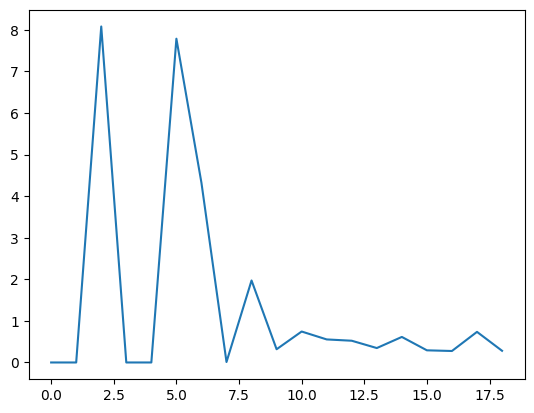

In [12]:
plt.plot(avg_loss)